In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
#standard stats
dfs = pd.read_html('https://fbref.com/en/comps/Big5/stats/squads/Big-5-European-Leagues-Stats')
#for idx,table in enumerate(dfs):
 #print("***************************")
 #print(idx)
 #print(table)
stand = pd.DataFrame(dfs[0])
opp_stand = pd.DataFrame(dfs[1])
stand.drop(columns=["Per 90 Minutes"], inplace=True)
stand.columns = stand.columns.droplevel()
for_stand = stand[['Squad','Poss','npxG']]
opp_stand.drop(columns=["Per 90 Minutes"], inplace=True)
opp_stand.columns = opp_stand.columns.droplevel()
ag_stand = opp_stand[['Squad','npxG']]
final_stand = pd.merge(for_stand, ag_stand, left_index=True, right_index=True, suffixes=('', '_opp'))
final_stand.drop(columns=["Squad_opp"], inplace=True)
final_stand.head()

C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\2120351193.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  stand.drop(columns=["Per 90 Minutes"], inplace=True)
C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\2120351193.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  opp_stand.drop(columns=["Per 90 Minutes"], inplace=True)


,Squad,Poss,npxG,npxG_opp
0,Alavés,42.2,24.8,20.4
1,Almería,47.5,28.0,31.9
2,Arsenal,60.3,35.1,15.1
3,Aston Villa,55.2,34.1,26.7
4,Atalanta,50.9,27.2,17.4


In [3]:
#passing stats
dfp = pd.read_html('https://fbref.com/en/comps/Big5/passing/squads/Big-5-European-Leagues-Stats')
#for idx,table in enumerate(dfp):
 #print("***************************")
 #print(idx)
 #print(table)
pas = pd.DataFrame(dfp[0])
opp_pas = pd.DataFrame(dfp[1])
pas.columns = pas.columns.droplevel()
cols = []
count = 1
for column in pas.columns:
    if column == 'Att':
        cols.append(f'Att_{count}')
        count+=1
        continue
    cols.append(column)
pas.columns = cols
for_pas = pas[['Squad','90s','Att_1','TotDist','PrgDist','CrsPA']]
opp_pas.columns = opp_pas.columns.droplevel()
cols = []
count = 1
for column in opp_pas.columns:
    if column == 'Att':
        cols.append(f'Att_{count}')
        count+=1
        continue
    cols.append(column)
opp_pas.columns = cols
ag_pas = opp_pas[['Squad','90s','Att_1']]
final_pas = pd.merge(for_pas, ag_pas, left_index=True, right_index=True, suffixes=('', '_opp'))
final_pas.drop(columns=["Squad_opp","90s_opp"], inplace=True)
stanpas = pd.merge(final_stand, final_pas, left_index=True, right_index=True, suffixes=('', '_opp'))
stanpas.drop(columns=["Squad_opp"], inplace=True)
stanpas['pas90'] = stanpas['Att_1']/stanpas['90s']
stanpas.pas90=stanpas.pas90.round(2)
stanpas['Crs90'] = stanpas['CrsPA']/stanpas['90s']
stanpas.Crs90=stanpas.Crs90.round(2)
stanpas.head()

,Squad,Poss,npxG,npxG_opp,90s,Att_1,TotDist,PrgDist,CrsPA,Att_1_opp,pas90,Crs90
0,Alavés,42.2,24.8,20.4,22.0,8289,111498,48445,58,11730,376.77,2.64
1,Almería,47.5,28.0,31.9,22.0,9625,134159,49989,56,10692,437.50,2.55
2,Arsenal,60.3,35.1,15.1,21.0,12778,180043,57348,42,8414,608.48,2.00
3,Aston Villa,55.2,34.1,26.7,21.0,10939,159017,53894,43,9072,520.90,2.05
4,Atalanta,50.9,27.2,17.4,20.0,10517,146551,52771,57,10183,525.85,2.85


In [4]:
#sca stats
dfg = pd.read_html('https://fbref.com/en/comps/Big5/gca/squads/Big-5-European-Leagues-Stats')
#for idx,table in enumerate(dfg):
 #print("***************************")
 #print(idx)
 #print(table)
sca = pd.DataFrame(dfg[0])
sca.columns = sca.columns.droplevel()
cols = []
count = 1
for column in sca.columns:
    if column == 'PassDead':
        cols.append(f'PassDead_{count}')
        count+=1
        continue
    cols.append(column)
sca.columns = cols
sca.head()
for_sca = sca[['Squad','90s','PassDead_1']]
stanpasca = pd.merge(stanpas, for_sca, left_index=True, right_index=True, suffixes=('', '_opp'))
stanpasca.drop(columns=["Squad_opp"], inplace=True)
stanpasca.head()

,Squad,Poss,npxG,npxG_opp,90s,Att_1,TotDist,PrgDist,CrsPA,Att_1_opp,pas90,Crs90,90s_opp,PassDead_1
0,Alavés,42.2,24.8,20.4,22.0,8289,111498,48445,58,11730,376.77,2.64,22.0,46
1,Almería,47.5,28.0,31.9,22.0,9625,134159,49989,56,10692,437.50,2.55,22.0,44
2,Arsenal,60.3,35.1,15.1,21.0,12778,180043,57348,42,8414,608.48,2.00,21.0,49
3,Aston Villa,55.2,34.1,26.7,21.0,10939,159017,53894,43,9072,520.90,2.05,21.0,45
4,Atalanta,50.9,27.2,17.4,20.0,10517,146551,52771,57,10183,525.85,2.85,20.0,43


In [5]:
#defensive stats
dft = pd.read_html('https://fbref.com/en/comps/Big5/defense/squads/Big-5-European-Leagues-Stats')
#for idx,table in enumerate(dft):
 #print("***************************")
 #print(idx)
 #print(table)
tak = pd.DataFrame(dft[0])
opp_tak = pd.DataFrame(dft[1])
tak.columns = tak.columns.droplevel()
for_tak = tak[['Squad','Def 3rd','Mid 3rd','Att 3rd','Att','Tkl+Int']]
opp_tak.columns = opp_tak.columns.droplevel()
ag_tak = opp_tak[['Squad','Att','Tkl+Int']]
final_tak = pd.merge(for_tak, ag_tak, left_index=True, right_index=True, suffixes=('', '_opp'))
final_tak.drop(columns=["Squad_opp"], inplace=True)
stanpascat = pd.merge(stanpasca, final_tak, left_index=True, right_index=True, suffixes=('', '_opp'))
stanpascat.drop(columns=["Squad_opp"], inplace=True)
stanpascat.head()

,Squad,Poss,npxG,npxG_opp,90s,Att_1,TotDist,PrgDist,CrsPA,Att_1_opp,...,Crs90,90s_opp,PassDead_1,Def 3rd,Mid 3rd,Att 3rd,Att,Tkl+Int,Att_opp,Tkl+Int_opp
0,Alavés,42.2,24.8,20.4,22.0,8289,111498,48445,58,11730,...,2.64,22.0,46,159,132,38,355,478,334,452
1,Almería,47.5,28.0,31.9,22.0,9625,134159,49989,56,10692,...,2.55,22.0,44,210,137,35,350,554,352,489
2,Arsenal,60.3,35.1,15.1,21.0,12778,180043,57348,42,8414,...,2.00,21.0,49,143,145,59,306,509,333,572
3,Aston Villa,55.2,34.1,26.7,21.0,10939,159017,53894,43,9072,...,2.05,21.0,45,156,127,35,310,464,375,598
4,Atalanta,50.9,27.2,17.4,20.0,10517,146551,52771,57,10183,...,2.85,20.0,43,146,129,42,301,519,285,518


In [6]:
#possession stats
dftpo = pd.read_html('https://fbref.com/en/comps/Big5/possession/squads/Big-5-European-Leagues-Stats')
#for idx,table in enumerate(dftpo):
 #print("***************************")
 #print(idx)
 #print(table)
pos = pd.DataFrame(dftpo[0])
opp_pos = pd.DataFrame(dftpo[1])
pos.columns = pos.columns.droplevel()
for_pos = pos[['Squad','Touches','Att 3rd']]
opp_pos.columns = opp_pos.columns.droplevel()
ag_pos = opp_pos[['Squad','Att 3rd']]
final_pos = pd.merge(for_pos, ag_pos, left_index=True, right_index=True, suffixes=('', '_opp'))
final_pos.drop(columns=["Squad_opp"], inplace=True)
stanpascatpo = pd.merge(stanpascat, final_pos, left_index=True, right_index=True, suffixes=('', '_opp'))
stanpascatpo.drop(columns=["Squad_opp"], inplace=True)
cols = []
count = 1
for column in stanpascatpo.columns:
    if column == 'Att 3rd_opp':
        cols.append(f'Att 3rd_opp_{count}')
        count+=1
        continue
    cols.append(column)
stanpascatpo.columns = cols
stanpascatpo = stanpascatpo.rename(columns={'Att 3rd_opp_1': 'Att 3rd touch', 'Att 3rd_opp_2': 'Att 3rd touch_opp'})
stanpascatpo.head()

C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\4220869892.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Att 3rd_opp'} in the result is deprecated and will raise a MergeError in a future version.
  stanpascatpo = pd.merge(stanpascat, final_pos, left_index=True, right_index=True, suffixes=('', '_opp'))


,Squad,Poss,npxG,npxG_opp,90s,Att_1,TotDist,PrgDist,CrsPA,Att_1_opp,...,Def 3rd,Mid 3rd,Att 3rd,Att,Tkl+Int,Att_opp,Tkl+Int_opp,Touches,Att 3rd touch,Att 3rd touch_opp
0,Alavés,42.2,24.8,20.4,22.0,8289,111498,48445,58,11730,...,159,132,38,355,478,334,452,10639,2803,3304
1,Almería,47.5,28.0,31.9,22.0,9625,134159,49989,56,10692,...,210,137,35,350,554,352,489,12042,2458,3491
2,Arsenal,60.3,35.1,15.1,21.0,12778,180043,57348,42,8414,...,143,145,59,306,509,333,572,14926,4779,1995
3,Aston Villa,55.2,34.1,26.7,21.0,10939,159017,53894,43,9072,...,156,127,35,310,464,375,598,13054,3269,2470
4,Atalanta,50.9,27.2,17.4,20.0,10517,146551,52771,57,10183,...,146,129,42,301,519,285,518,12763,3177,2434


In [7]:
stanpascatpo.columns.values

array(['Squad', 'Poss', 'npxG', 'npxG_opp', '90s', 'Att_1', 'TotDist',
       'PrgDist', 'CrsPA', 'Att_1_opp', 'pas90', 'Crs90', '90s_opp',
       'PassDead_1', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att', 'Tkl+Int',
       'Att_opp', 'Tkl+Int_opp', 'Touches', 'Att 3rd touch',
       'Att 3rd touch_opp'], dtype=object)

In [8]:
#setup metrics
team_style = stanpascatpo[['Squad','Poss','Def 3rd','Mid 3rd','Att 3rd']]
team_style['Possession'] = stanpascatpo['Poss']
team_style['Press intensity'] = stanpascatpo['Att_1_opp']/(stanpascatpo['Tkl+Int']+stanpascatpo['Att'])
team_style['Press resistance'] = stanpascatpo['Att_1']/(stanpascatpo['Tkl+Int_opp']+stanpascatpo['Att_opp'])
team_style['Field tilt'] = stanpascatpo['Att 3rd touch']/(stanpascatpo['Att 3rd touch']+stanpascatpo['Att 3rd touch_opp'])*100
team_style['Tempo'] = stanpascatpo['Att_1']*100/stanpascatpo['Touches']
team_style['Directness'] = stanpascatpo['PrgDist']*100/stanpascatpo['TotDist']
team_style['Crossing'] = stanpascatpo['Crs90']
team_style['Set pieces'] = stanpascatpo['PassDead_1']
team_style['npxG share'] = stanpascatpo['npxG']/(stanpascatpo['npxG']+stanpascatpo['npxG_opp'])*100
team_style['Def 3rd tackles'] = team_style['Def 3rd'] / (team_style['Def 3rd'] + team_style['Mid 3rd'] + team_style['Att 3rd']) 
team_style['Mid 3rd tackles'] = team_style['Mid 3rd'] / (team_style['Def 3rd'] + team_style['Mid 3rd'] + team_style['Att 3rd']) 
team_style['Att 3rd tackles'] = team_style['Att 3rd'] / (team_style['Def 3rd'] + team_style['Mid 3rd'] + team_style['Att 3rd']) 
team_style['Defensive height'] = (team_style['Def 3rd tackles']*16.5*1.1) + (team_style['Mid 3rd tackles']*49.5*1.1) + (team_style['Att 3rd tackles']*82.5*1.1)
team_style.head()

C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\4071887340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_style['Possession'] = stanpascatpo['Poss']
C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\4071887340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_style['Press intensity'] = stanpascatpo['Att_1_opp']/(stanpascatpo['Tkl+Int']+stanpascatpo['Att'])
C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\4071887340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Squad,Poss,Def 3rd,Mid 3rd,Att 3rd,Possession,Press intensity,Press resistance,Field tilt,Tempo,Directness,Crossing,Set pieces,npxG share,Def 3rd tackles,Mid 3rd tackles,Att 3rd tackles,Defensive height
0,Alavés,42.2,159,132,38,42.2,14.081633,10.545802,45.898150,77.911458,43.449210,2.64,46,54.867257,0.483283,0.401216,0.115502,41.099544
1,Almería,47.5,210,137,35,47.5,11.827434,11.444709,41.317869,79.928583,37.261011,2.55,44,46.744574,0.549738,0.358639,0.091623,37.820419
2,Arsenal,60.3,143,145,59,60.3,10.323926,14.119337,70.549159,85.609004,31.852391,2.00,49,69.920319,0.412104,0.417867,0.170029,45.662680
3,Aston Villa,55.2,156,127,35,55.2,11.720930,11.242549,56.961143,83.798070,33.891974,2.05,45,56.085526,0.490566,0.399371,0.110063,40.637736
4,Atalanta,50.9,146,129,42,50.9,12.418293,13.097136,56.620923,82.402257,36.008625,2.85,43,60.986547,0.460568,0.406940,0.132492,42.540852


In [9]:
final_styles = team_style[['Squad','Possession','Press intensity','Press resistance','Field tilt','Tempo','Directness','Crossing','Set pieces','npxG share','Defensive height']]
final_styles.head()

,Squad,Possession,Press intensity,Press resistance,Field tilt,Tempo,Directness,Crossing,Set pieces,npxG share,Defensive height
0,Alavés,42.2,14.081633,10.545802,45.898150,77.911458,43.449210,2.64,46,54.867257,41.099544
1,Almería,47.5,11.827434,11.444709,41.317869,79.928583,37.261011,2.55,44,46.744574,37.820419
2,Arsenal,60.3,10.323926,14.119337,70.549159,85.609004,31.852391,2.00,49,69.920319,45.662680
3,Aston Villa,55.2,11.720930,11.242549,56.961143,83.798070,33.891974,2.05,45,56.085526,40.637736
4,Atalanta,50.9,12.418293,13.097136,56.620923,82.402257,36.008625,2.85,43,60.986547,42.540852


In [10]:
def data_normalization(df):
  columns = ['Set pieces','Crossing', 'Press resistance']
  
  for column in columns:
    df[column] = (df[column]*100) / (df[column].max())

  df['Press intensity'] = (df['Press intensity'].min()*100) / (df['Press intensity'])

  return final_styles

final_styles = data_normalization(final_styles)

C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\2287692468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column]*100) / (df[column].max())
C:\Users\Louis\AppData\Local\Temp\ipykernel_11560\2287692468.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Press intensity'] = (df['Press intensity'].min()*100) / (df['Press intensity'])


In [11]:
final_styles.head()

,Squad,Possession,Press intensity,Press resistance,Field tilt,Tempo,Directness,Crossing,Set pieces,npxG share,Defensive height
0,Alavés,42.2,60.962784,57.537499,45.898150,77.911458,43.449210,56.531049,71.8750,54.867257,41.099544
1,Almería,47.5,72.581724,62.441902,41.317869,79.928583,37.261011,54.603854,68.7500,46.744574,37.820419
2,Arsenal,60.3,83.152038,77.034575,70.549159,85.609004,31.852391,42.826552,76.5625,69.920319,45.662680
3,Aston Villa,55.2,73.241245,61.338926,56.961143,83.798070,33.891974,43.897216,70.3125,56.085526,40.637736
4,Atalanta,50.9,69.128305,71.457483,56.620923,82.402257,36.008625,61.027837,67.1875,60.986547,42.540852


In [12]:
#select teams
final_styles = final_styles[(final_styles['Squad']=='West Ham') | (final_styles['Squad']=='Bournemouth')].reset_index()
final_styles = final_styles.drop(['index'],axis=1)
final_styles

,Squad,Possession,Press intensity,Press resistance,Field tilt,Tempo,Directness,Crossing,Set pieces,npxG share,Defensive height
0,Bournemouth,44.0,73.480642,45.227199,45.423674,77.113383,36.991375,48.822270,56.25,47.586207,42.895623
1,West Ham,40.7,57.590712,61.071798,35.031573,78.658695,39.001649,34.689507,87.50,44.951140,39.316757


In [13]:
#get parameters
params = list(final_styles.columns)
params = params[1:]
params

#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(final_styles[params][x])
    a = a - (a*.25)
    
    b = max(final_styles[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(final_styles['Squad'])):
    if final_styles['Squad'][x] == 'West Ham':
        a_values = final_styles.iloc[x].values.tolist()
    if final_styles['Squad'][x] == 'Bournemouth':
        b_values = final_styles.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [14]:
#title 

title = dict(
    title_name='West Ham',
    title_color = '#882259',
    subtitle_name = 'Premier League',
    subtitle_color = '#882259',
    title_name_2='Bournemouth',
    title_color_2 = 'Red',
    subtitle_name_2 = 'Premier League',
    subtitle_color_2 = 'Red',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = 'LouisM via FBREF'

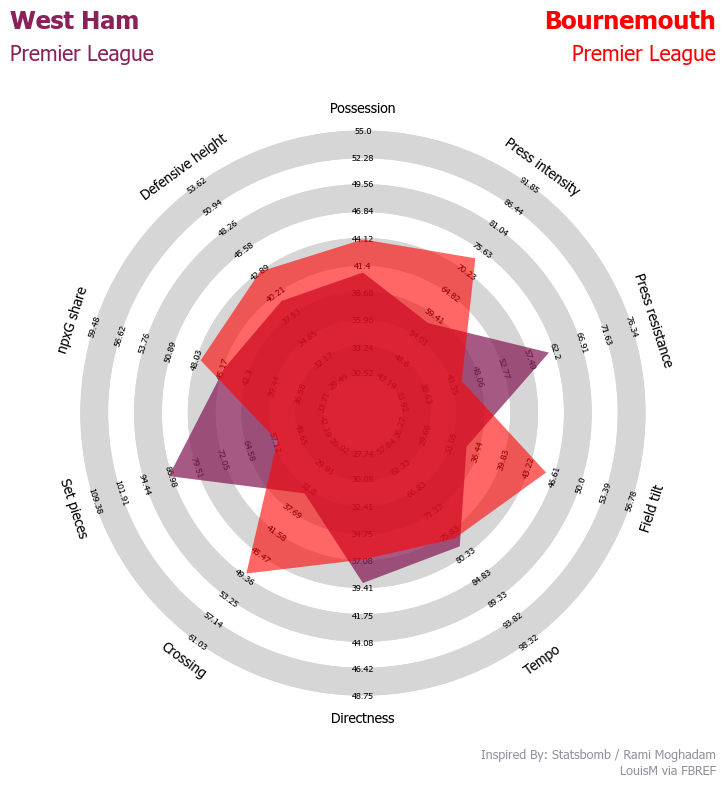

In [15]:
final_styles = Radar(fontfamily="Tahoma")

fig,ax = final_styles.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['#882259','Red'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)